In [49]:
# Import necessary libraries/modules
import vertica_python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [50]:
# Set up the Vertica Connection Information
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')

conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False
            }

connection = vertica_python.connect(**conn_info)
cur = connection.cursor('dict')

# Instructor Paced Courses

In [51]:
query = """
SELECT
	a.course_id,
	DATEDIFF(day, course_start_date, course_end_date) AS open_length,
	pacing_type,
	level_type,
    course_partner,
    content_language,
    course_run_number,
	sum_enrolls,
    sum_bookings
FROM
	business_intelligence.course_master a
LEFT JOIN
	business_intelligence.course_stats_summary b
ON
	a.course_id = b.course_id
WHERE
    course_start_date <= CURRENT_DATE()
AND
	course_end_date <= CURRENT_DATE()
AND
	DATEDIFF(day, course_start_date, course_end_date)>0
AND
	pacing_type = 'instructor_paced';
"""

cur.execute(query)

instructor_paced = pd.DataFrame(cur.fetchall())

[(0, 200)]

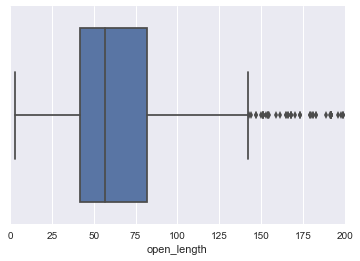

In [52]:
ax = sns.boxplot(x=instructor_paced['open_length'])
ax.set(xlim=(0, 200))

# Is there a relationship between course open length and enrollments?

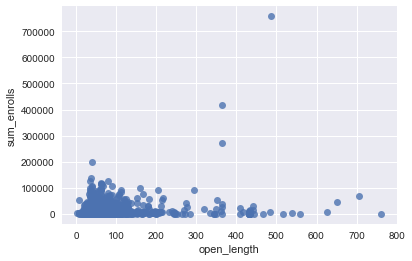

In [53]:
ax = sns.regplot(x=instructor_paced['open_length'], y=instructor_paced['sum_enrolls'], fit_reg=False)

In [54]:
# Splitting course announcement dates into Quartiles to see if there's a significant difference between announcement lead time and enrollments
instructor_paced['Open Length Quartile'] = 'Null'

instructor_paced['Open Length Quartile'][instructor_paced['open_length'] >= instructor_paced['open_length'].quantile(.75)] = 'Q4'
instructor_paced['Open Length Quartile'][instructor_paced['open_length'] < instructor_paced['open_length'].quantile(.75)] = 'Q3'
instructor_paced['Open Length Quartile'][instructor_paced['open_length'] < instructor_paced['open_length'].quantile(.50)] = 'Q2'
instructor_paced['Open Length Quartile'][instructor_paced['open_length'] < instructor_paced['open_length'].quantile(.25)] = 'Q1'

C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\_

In [55]:
# Group by Quartiles to see Mean/Median of Enrollments for each Announcement Window Quartile
print instructor_paced.groupby(['Open Length Quartile'])['sum_enrolls'].mean()
print instructor_paced.groupby(['Open Length Quartile'])['sum_enrolls'].median()

print instructor_paced.groupby(['Open Length Quartile'])['open_length'].mean()
print instructor_paced.groupby(['Open Length Quartile'])['open_length'].median()

Open Length Quartile
Q1    12230.466851
Q2    10069.434470
Q3    14922.171548
Q4    17757.021231
Name: sum_enrolls, dtype: float64
Open Length Quartile
Q1    5230.5
Q2    6682.0
Q3    8597.0
Q4    8071.0
Name: sum_enrolls, dtype: float64
Open Length Quartile
Q1     31.839779
Q2     48.468694
Q3     67.317992
Q4    150.112527
Name: open_length, dtype: float64
Open Length Quartile
Q1     34
Q2     49
Q3     66
Q4    109
Name: open_length, dtype: int64


[(0, 50000)]

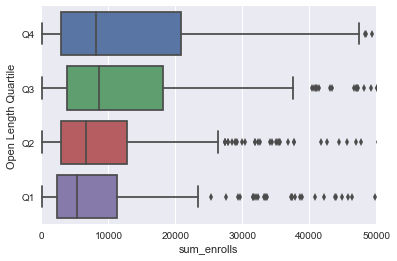

In [56]:
ax = sns.boxplot(x=instructor_paced['sum_enrolls'], y=instructor_paced['Open Length Quartile'], order=['Q4', 'Q3', 'Q2', 'Q1'])
ax.set(xlim=(0, 50000))

In [57]:
from scipy.stats import ttest_ind

bottom_quartile = instructor_paced[instructor_paced['Open Length Quartile'] == 'Q1']['sum_enrolls']
top_quartile = instructor_paced[instructor_paced['Open Length Quartile'] == 'Q4']['sum_enrolls']

print (ttest_ind(bottom_quartile, top_quartile))

Ttest_indResult(statistic=-2.1767108450913981, pvalue=0.029783013877426715)


# Self Paced Courses

In [58]:
query = """
SELECT
	a.course_id,
	DATEDIFF(day, course_start_date, course_end_date) AS open_length,
	pacing_type,
	level_type,
    course_partner,
    content_language,
    course_run_number,
	sum_enrolls,
    sum_bookings
FROM
	business_intelligence.course_master a
LEFT JOIN
	business_intelligence.course_stats_summary b
ON
	a.course_id = b.course_id
WHERE
    course_start_date <= CURRENT_DATE()
AND
	course_end_date <= CURRENT_DATE()
AND
	DATEDIFF(day, course_start_date, course_end_date)>0
AND
	pacing_type = 'self_paced';
"""

cur.execute(query)

self_paced = pd.DataFrame(cur.fetchall())

[(0, 800)]

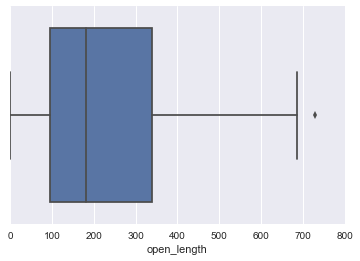

In [59]:
ax = sns.boxplot(x=self_paced['open_length'])
ax.set(xlim=(0, 800))

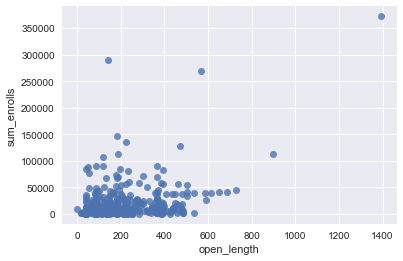

In [60]:
ax = sns.regplot(x=self_paced['open_length'], y=self_paced['sum_enrolls'], fit_reg=False)

In [61]:
# Splitting course announcement dates into Quartiles to see if there's a significant difference between announcement lead time and enrollments
self_paced['Open Length Quartile'] = 'Null'

self_paced['Open Length Quartile'][self_paced['open_length'] >= self_paced['open_length'].quantile(.75)] = 'Q4'
self_paced['Open Length Quartile'][self_paced['open_length'] < self_paced['open_length'].quantile(.75)] = 'Q3'
self_paced['Open Length Quartile'][self_paced['open_length'] < self_paced['open_length'].quantile(.50)] = 'Q2'
self_paced['Open Length Quartile'][self_paced['open_length'] < self_paced['open_length'].quantile(.25)] = 'Q1'

C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ochang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\_

In [62]:
# Group by Quartiles to see Mean/Median of Enrollments for each Announcement Window Quartile
print self_paced.groupby(['Open Length Quartile'])['sum_enrolls'].mean()
print self_paced.groupby(['Open Length Quartile'])['sum_enrolls'].median()

print self_paced.groupby(['Open Length Quartile'])['open_length'].mean()
print self_paced.groupby(['Open Length Quartile'])['open_length'].median()

Open Length Quartile
Q1    12677.504274
Q2    15635.215517
Q3    17462.942149
Q4    23445.686441
Name: sum_enrolls, dtype: float64
Open Length Quartile
Q1    6687
Q2    6686
Q3    7186
Q4    9667
Name: sum_enrolls, dtype: int64
Open Length Quartile
Q1     66.299145
Q2    133.982759
Q3    224.016529
Q4    425.906780
Name: open_length, dtype: float64
Open Length Quartile
Q1     73.0
Q2    132.5
Q3    211.0
Q4    391.5
Name: open_length, dtype: float64


[(0, 60000)]

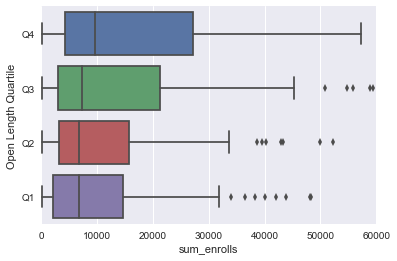

In [63]:
ax = sns.boxplot(x=self_paced['sum_enrolls'], y=self_paced['Open Length Quartile'], order=['Q4', 'Q3', 'Q2', 'Q1'])
ax.set(xlim=(0, 60000))

In [64]:
bottom_quartile = self_paced[self_paced['Open Length Quartile'] == 'Q1']['sum_enrolls']
top_quartile = self_paced[self_paced['Open Length Quartile'] == 'Q4']['sum_enrolls']

print (ttest_ind(bottom_quartile, top_quartile))

Ttest_indResult(statistic=-2.3772271805816865, pvalue=0.018251786707015799)


In [65]:
instructor_paced.groupby(['Open Length Quartile','course_partner'])['course_id'].count()

Open Length Quartile  course_partner       
Q1                    AdelaideX                 3
                      AmnestyInternationalX     1
                      BAx                       3
                      BUx                       2
                      BabsonX                   4
                      BerkeleyX                44
                      BerkleeX                  4
                      CatalystX                 4
                      Catalystx                 1
                      ChalmersX                 4
                      ColgateX                  2
                      ColumbiaX                 3
                      CornellX_UQx              1
                      CurtinX                   4
                      DartmouthX                3
                      DavidsonX                 4
                      DelftX                    6
                      EPFLx                     2
                      ETSx                      4
      

In [66]:
instructor_paced_Q4 = instructor_paced[instructor_paced['Open Length Quartile'] == 'Q4']

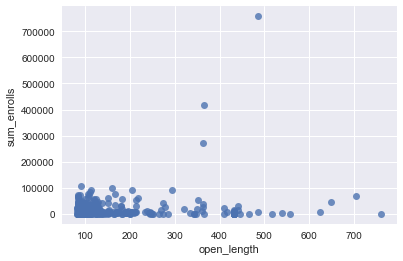

In [67]:
ax = sns.regplot(x=instructor_paced_Q4['open_length'], y=instructor_paced_Q4['sum_enrolls'], fit_reg=False)